# This is a Project of Md Hasibul Hasan for the Course STA 5703 that predicts the superconductor critical temperature from its physical and chemical properties

In [35]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
import statsmodels.api as sm
import seaborn as sns

In [2]:
#upload data
train = pd.read_csv('train.csv')
unique_m = pd.read_csv('unique_m.csv')

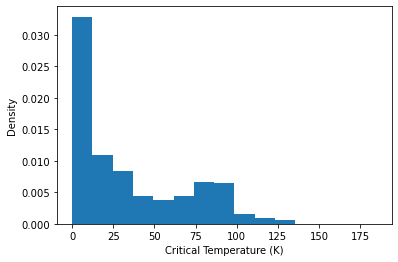

In [7]:
#Create histogram of semiconductor critical temperature
plt.hist(unique_m.critical_temp,bins = 15, density = True);
plt.xlabel('Critical Temperature (K)');
plt.ylabel('Density');
plt.savefig('Density_Tc.png', dpi = 300)

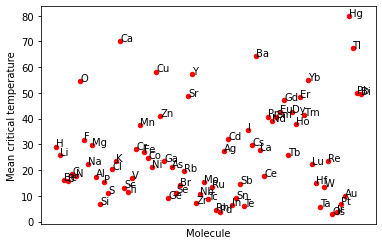

In [23]:
#Drawing average critical temperature for different molecules
binary = unique_m.iloc[: , :-2]
binary[binary != 0] = 1
df_mean = binary.mean(axis=0)
# Average Critical Temperature for Molecules
full_data = binary.join(unique_m['critical_temp'])
dict_t = {}
for (colName, colData) in full_data.iteritems():
    result = full_data[(full_data[colName] == 1)]    
    if not result.empty and colName != 'critical_temp':
        dict_t[colName] = result["critical_temp"].mean()
series = pd.Series(dict_t)
data = pd.DataFrame({'Molecule':series.index, 'Tc_Mean':series.values},index=series.index.tolist())
fig, ax = plt.subplots()
data.plot('Molecule', 'Tc_Mean', kind='scatter', ax=ax, c='red')
for a, b in data.iterrows():
       ax.annotate(a, b)
plt.ylabel('Mean critical temperature')
ax.axes.get_xaxis().set_ticks([])
plt.xlabel('Molecule')
plt.savefig('Mean_Tc_per_molecule.png', dpi = 300)

In [29]:
#### linear model to predict critical temperature from chemical formula
x = unique_m.iloc[: , :-2]
y = unique_m['critical_temp']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=6608)
lin_reg = LinearRegression().fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
#Check Accuracy
print('R2= ',r2_score(y_test,y_pred))
print('MSE=',mean_squared_error(y_test,y_pred))
print('RMSE=',np.sqrt(mean_squared_error(y_test,y_pred)))

R2=  0.3898174260027083
MSE= 727.6683005812263
RMSE= 26.975327626948783


In [30]:
#Run RF from Physical Properties Data
y = np.array(train.critical_temp)
#Drop unnecessary variables
train.drop(['critical_temp'],1,inplace=True)
#Define input variable
X=train.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)

C:\Users\hasib\AppData\Local\Temp/ipykernel_1412/1802279841.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train.drop(['critical_temp'],1,inplace=True)


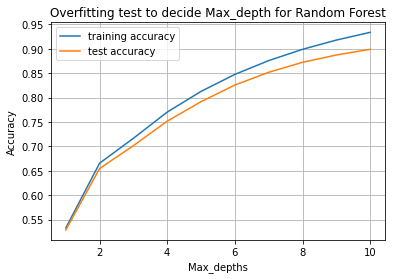

In [31]:
#Check overfitting with max_depth
training_accuracy = []
test_accuracy = []

# try max_depth from 1 to 11
depth_settings = range(1, 11)

for n_depth in depth_settings:
    # build the model
    tree = RandomForestRegressor(max_depth=n_depth,random_state=6608)
    tree.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree.score(X_test, y_test))  
plt.plot(depth_settings, training_accuracy, label="training accuracy");
plt.plot(depth_settings, test_accuracy, label="test accuracy");
plt.ylabel("Accuracy");
plt.xlabel("Max_depths");
plt.legend();
plt.grid();
plt.title("Overfitting test to decide Max_depth for Random Forest");
plt.savefig('RF_Overfitting.png',dpi = 300)

In [32]:
#Fit a random forest regressor with max_depth = 8
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6608)
forest.fit(X_train, y_train)
#Get the accuracy score
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.899
Accuracy on test set: 0.872


In [33]:
#Check feature importance for top 15 features
a = np.array(train.columns)
b = np.array(forest.feature_importances_)
d = {'Features': [a],
    'Importance': [b]}
df_col = pd.DataFrame(a,columns=['Features'])
df_imp = pd.DataFrame(b,columns=['Importance'])
frames = [df_col, df_imp]
result = pd.concat(frames, axis=1)
result = result.sort_values(by=['Importance'])
result_15 = result.tail(15)

,Features,Importance
8,wtd_range_atomic_mass,0.005780
43,gmean_ElectronAffinity,0.006666
35,entropy_Density,0.006982
70,wtd_std_ThermalConductivity,0.007127
33,gmean_Density,0.007201
66,wtd_entropy_ThermalConductivity,0.008148
27,range_atomic_radius,0.008582
50,wtd_std_ElectronAffinity,0.010546
72,wtd_mean_Valence,0.010623
31,mean_Density,0.010983


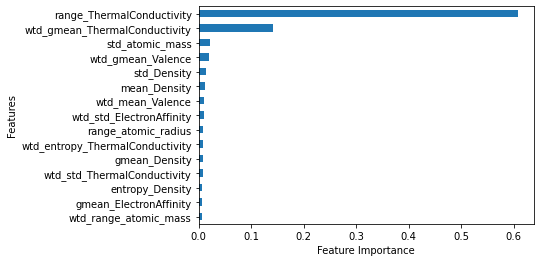

In [100]:
#Draw feature importance plot
result_15.plot.barh(x='Features', y='Importance',legend=False);
plt.xlabel('Feature Importance');
plt.savefig('RF_Feature_Importance.png',dpi = 300)

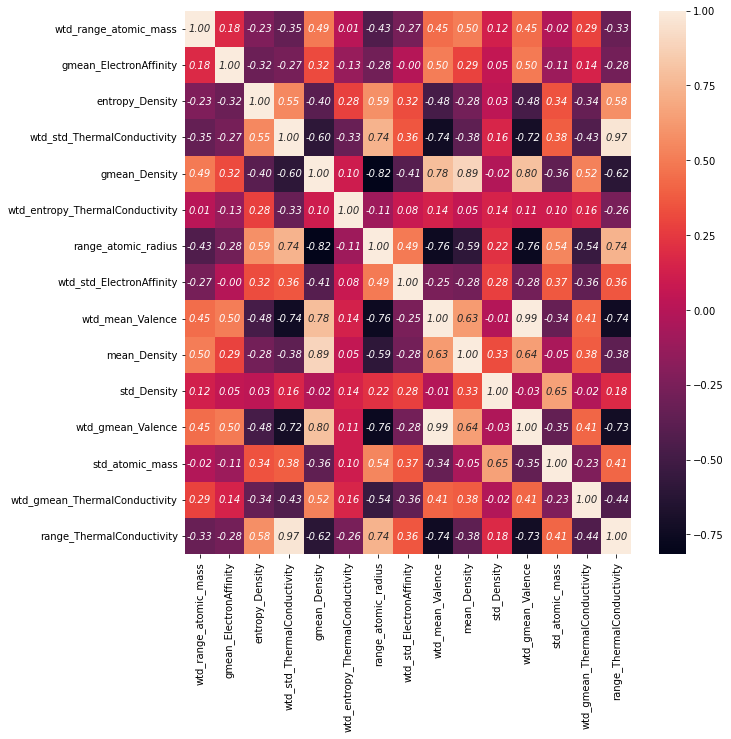

In [37]:
#Prepare data for different number of feature importance to create correlation plots
result_15 = result.tail(15)
result_5 = result.tail(5)
result_10 = result.tail(10)
result_20 = result.tail(20)
result_25 = result.tail(25)
result_30 = result.tail(30)
result_35 = result.tail(35)
train_5 = train[result_5.Features]
train_10 = train[result_10.Features]
train_15 = train[result_15.Features]
train_20 = train[result_20.Features]
train_25 = train[result_25.Features]
train_30 = train[result_30.Features]
train_35 = train[result_35.Features]
X_5=train_5.values
X_10 = train_10.values
X_15 = train_15.values
X_20 = train_20.values
X_25 = train_25.values
X_30 = train_30.values
X_35 = train_35.values
corrM = train_15.corr()
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
plt.figure(figsize=(10,10))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws)
plt.savefig('corr.png',dpi = 300)

E:\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1565419.5494935461, tolerance: 1874.632940816932
  model = cd_fast.enet_coordinate_descent(
E:\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84879.24521445017, tolerance: 1874.632940816932
  model = cd_fast.enet_coordinate_descent(
E:\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163882.74124618433, tolerance: 1874.632940816932
  model = cd_fast.enet_coordinate_descent(
E:\Python\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not c

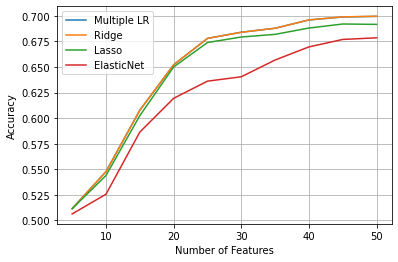

In [38]:
#Accuracy check for different regression models
accuracy = []
accuracy_ridge = []
accuracy_lasso = []
accuracy_elastic = []
# try features from 5 to 50
n_features = [5,10,15,20,25,30,35,40,45,50]
for features in n_features:
    X_n_features = result.tail(features)
    train_n_features = train[X_n_features.Features]
    X_features = train_n_features.values
    X_train, X_test, y_train, y_test = train_test_split(X_features,y, random_state=66)
    reg = LinearRegression().fit(X_train, y_train)
    accuracy.append(reg.score(X_test, y_test)) 
    clf = Ridge(alpha=1.0)
    clf.fit(X_train, y_train)
    accuracy_ridge.append(clf.score(X_test, y_test))
    cld = linear_model.Lasso(alpha=0.1)
    cld.fit(X_train, y_train)
    accuracy_lasso.append(cld.score(X_test,y_test))
    regr = ElasticNet(random_state=0)
    regr.fit(X_train, y_train)
    accuracy_elastic.append(regr.score(X_test, y_test))
plt.plot(n_features, accuracy,label="Multiple LR");
plt.plot(n_features,accuracy_ridge,label="Ridge");
plt.plot(n_features,accuracy_lasso,label="Lasso");
plt.plot(n_features,accuracy_elastic,label="ElasticNet") 
plt.ylabel("Accuracy");
plt.xlabel("Number of Features");
plt.legend();
plt.grid();
plt.savefig('Linear_Regression_Comparison.png',dpi = 300)

<AxesSubplot:>

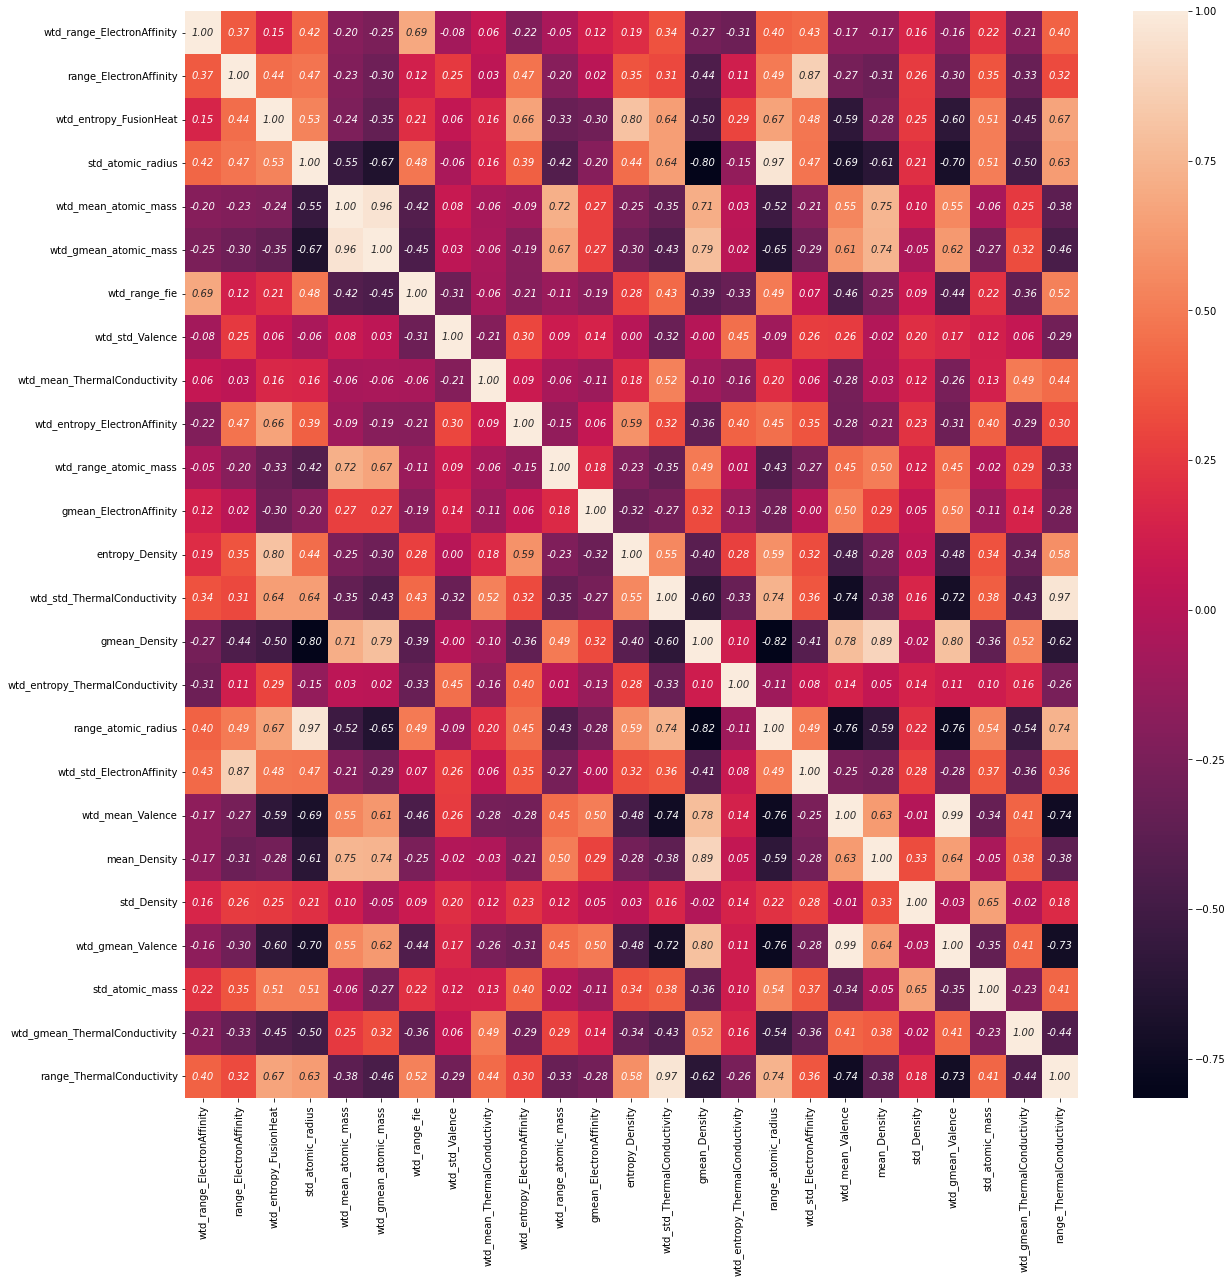

In [47]:
#Correlation plot for top 25 features
result_25 = result.tail(25)
train_25 = train[result_25.Features]
train_25
corrM = train_25.corr()
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
plt.figure(figsize=(20,20))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws)

In [48]:
#Delete high collinear variables (Pearson coefficient > 0.85)
correlation_1 = train.drop(['wtd_mean_Valence', 'gmean_Density','wtd_std_ThermalConductivity','wtd_mean_atomic_mass','std_atomic_radius','range_ElectronAffinity'], axis=1)

In [49]:
#Run random forest again to get revised correlation
X=correlation_1.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
#Fit a random forest regressor with max_depth = 8
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6608)
forest.fit(X_train, y_train)
#Get the accuracy score
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.898
Accuracy on test set: 0.871


NameError: name 'Correlation_1' is not defined

In [50]:
#Correlation plot for revised features
a = np.array(correlation_1.columns)
b = np.array(forest.feature_importances_)
d = {'Features': [a],
    'Importance': [b]}
df_col = pd.DataFrame(a,columns=['Features'])
df_imp = pd.DataFrame(b,columns=['Importance'])
frames = [df_col, df_imp]
result = pd.concat(frames, axis=1)
result = result.sort_values(by=['Importance'])
result_25 = result.tail(25)
train_25 = train[result_25.Features]
train_25
corrM = train_25.corr()
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
plt.figure(figsize=(20,20))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws)

,Features,Importance
3,wtd_gmean_atomic_mass,0.002941
28,wtd_std_atomic_radius,0.003057
16,range_fie,0.003137
44,wtd_range_ElectronAffinity,0.003338
41,wtd_gmean_ElectronAffinity,0.003510
9,wtd_std_atomic_mass,0.004137
27,wtd_range_atomic_radius,0.004276
33,wtd_entropy_Density,0.004602
52,wtd_entropy_FusionHeat,0.004654
43,wtd_entropy_ElectronAffinity,0.004789


In [55]:
#Delete high collinear variables (Pearson coefficient > 0.85)
correlation_2 = correlation_1.drop(['range_fie', 'wtd_std_atomic_radius','wtd_std_atomic_mass'], axis=1)

,number_of_elements,mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,mean_fie,...,std_ThermalConductivity,mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,775.425000,...,168.854244,2.25,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,766.440000,...,198.554600,2.00,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,775.425000,...,168.854244,2.25,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,775.425000,...,168.854244,2.25,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,775.425000,...,168.854244,2.25,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,661.775000,...,55.056789,3.25,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904
21259,5,92.266740,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,747.780000,...,151.164639,2.20,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959
21260,2,99.663190,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,733.550000,...,8.500000,4.50,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000
21261,2,99.663190,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,733.550000,...,8.500000,4.50,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493


In [59]:
#Run random forest again to get revised correlation
X=correlation_2.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
#Fit a random forest regressor with max_depth = 8
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6608)
forest.fit(X_train, y_train)
#Get the accuracy score
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
a = np.array(correlation_2.columns)
b = np.array(forest.feature_importances_)
d = {'Features': [a],
    'Importance': [b]}
df_col = pd.DataFrame(a,columns=['Features'])
df_imp = pd.DataFrame(b,columns=['Importance'])
frames = [df_col, df_imp]
result = pd.concat(frames, axis=1)
result = result.sort_values(by=['Importance'])
result_25 = result.tail(25)

Accuracy on training set: 0.897
Accuracy on test set: 0.870


,Features,Importance
17,wtd_std_fie,0.002591
3,wtd_gmean_atomic_mass,0.003194
34,wtd_std_Density,0.003224
58,entropy_ThermalConductivity,0.003265
38,wtd_gmean_ElectronAffinity,0.003731
41,wtd_range_ElectronAffinity,0.003972
25,wtd_range_atomic_radius,0.004492
30,wtd_entropy_Density,0.004577
40,wtd_entropy_ElectronAffinity,0.004792
49,wtd_entropy_FusionHeat,0.005001


<AxesSubplot:>

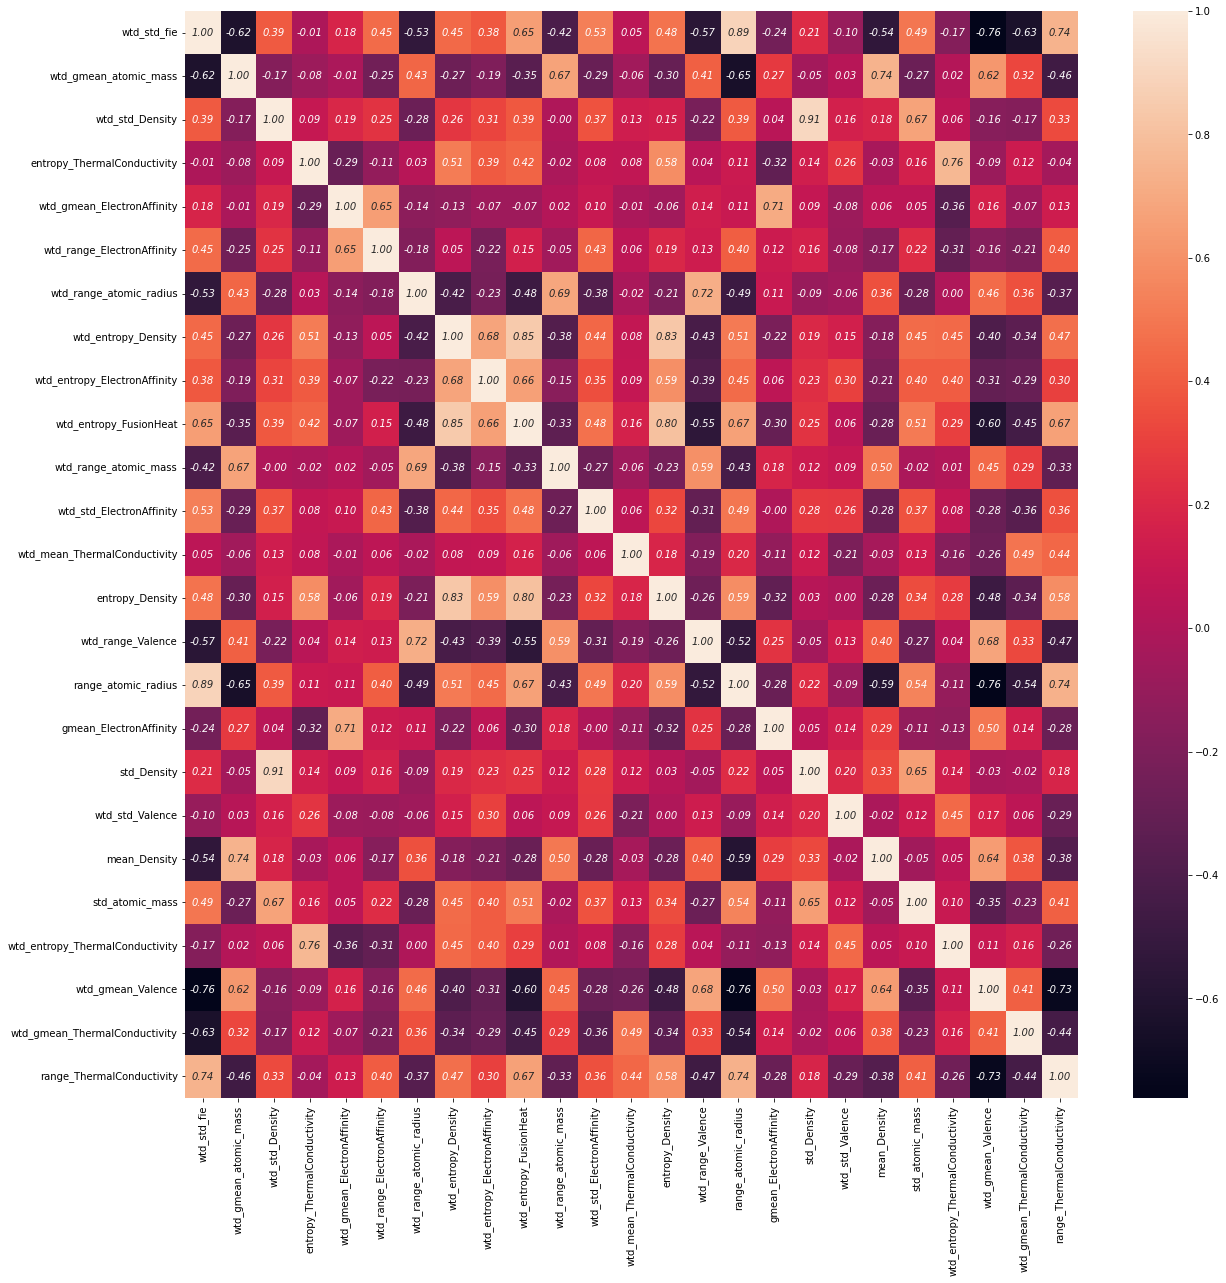

In [57]:
#Correlation plot for revised features
train_25 = train[result_25.Features]
corrM = train_25.corr()
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
plt.figure(figsize=(20,20))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws)

In [58]:
#Delete high collinear variables (Pearson coefficient > 0.85)
correlation_3 = correlation_2.drop(['wtd_std_fie', 'wtd_std_Density'], axis=1)

,number_of_elements,mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,mean_fie,...,std_ThermalConductivity,mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,775.425000,...,168.854244,2.25,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,766.440000,...,198.554600,2.00,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,775.425000,...,168.854244,2.25,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,775.425000,...,168.854244,2.25,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,775.425000,...,168.854244,2.25,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,661.775000,...,55.056789,3.25,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904
21259,5,92.266740,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,747.780000,...,151.164639,2.20,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959
21260,2,99.663190,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,733.550000,...,8.500000,4.50,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000
21261,2,99.663190,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,733.550000,...,8.500000,4.50,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493


In [60]:
#Run random forest again to get revised correlation
X=correlation_3.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
#Fit a random forest regressor with max_depth = 8
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6608)
forest.fit(X_train, y_train)
#Get the accuracy score
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
a = np.array(correlation_3.columns)
b = np.array(forest.feature_importances_)
d = {'Features': [a],
    'Importance': [b]}
df_col = pd.DataFrame(a,columns=['Features'])
df_imp = pd.DataFrame(b,columns=['Importance'])
frames = [df_col, df_imp]
result = pd.concat(frames, axis=1)
result = result.sort_values(by=['Importance'])
result_25 = result.tail(25)
result_25

Accuracy on training set: 0.897
Accuracy on test set: 0.870


,Features,Importance
15,wtd_range_fie,0.002498
60,std_ThermalConductivity,0.002779
3,wtd_gmean_atomic_mass,0.003113
56,entropy_ThermalConductivity,0.003364
36,wtd_gmean_ElectronAffinity,0.003809
39,wtd_range_ElectronAffinity,0.004234
29,wtd_entropy_Density,0.004848
24,wtd_range_atomic_radius,0.004901
38,wtd_entropy_ElectronAffinity,0.004946
47,wtd_entropy_FusionHeat,0.005148


<AxesSubplot:>

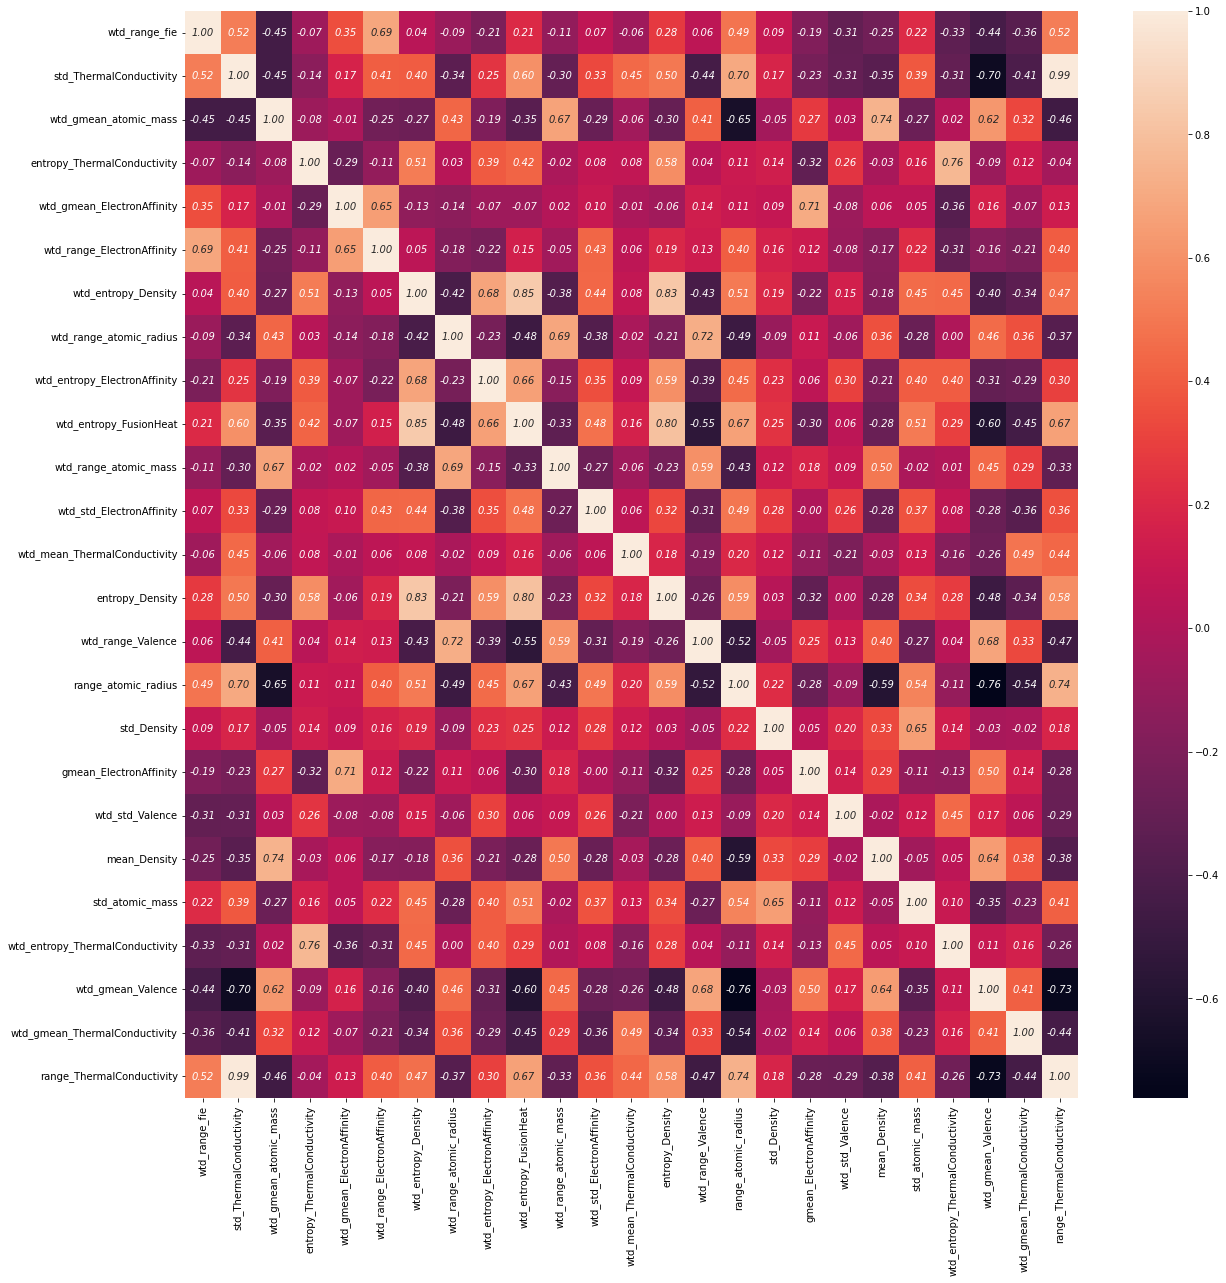

In [61]:
#Correlation plot for revised features
train_25 = train[result_25.Features]
corrM = train_25.corr()
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
plt.figure(figsize=(20,20))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws)

In [62]:
#Delete high collinear variables (Pearson coefficient > 0.85)
correlation_4 = correlation_3.drop(['std_ThermalConductivity'], axis=1)

,number_of_elements,mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,mean_fie,...,wtd_range_ThermalConductivity,mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,775.425000,...,57.127669,2.25,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,766.440000,...,51.413383,2.00,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,775.425000,...,57.127669,2.25,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,775.425000,...,57.127669,2.25,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,775.425000,...,57.127669,2.25,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,661.775000,...,83.048889,3.25,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904
21259,5,92.266740,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,747.780000,...,76.176553,2.20,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959
21260,2,99.663190,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,733.550000,...,29.000000,4.50,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000
21261,2,99.663190,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,733.550000,...,15.250000,4.50,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493


In [63]:
#Run random forest again to get revised correlation
X=correlation_4.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
#Fit a random forest regressor with max_depth = 8
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6608)
forest.fit(X_train, y_train)
#Get the accuracy score
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
a = np.array(correlation_4.columns)
b = np.array(forest.feature_importances_)
d = {'Features': [a],
    'Importance': [b]}
df_col = pd.DataFrame(a,columns=['Features'])
df_imp = pd.DataFrame(b,columns=['Importance'])
frames = [df_col, df_imp]
result = pd.concat(frames, axis=1)
result = result.sort_values(by=['Importance'])
result_25 = result.tail(25)

Accuracy on training set: 0.897
Accuracy on test set: 0.870


,Features,Importance
18,wtd_mean_atomic_radius,0.002432
59,wtd_range_ThermalConductivity,0.002468
3,wtd_gmean_atomic_mass,0.003201
36,wtd_gmean_ElectronAffinity,0.003906
56,entropy_ThermalConductivity,0.003939
39,wtd_range_ElectronAffinity,0.004249
38,wtd_entropy_ElectronAffinity,0.004881
29,wtd_entropy_Density,0.004890
24,wtd_range_atomic_radius,0.005036
47,wtd_entropy_FusionHeat,0.005060


<AxesSubplot:>

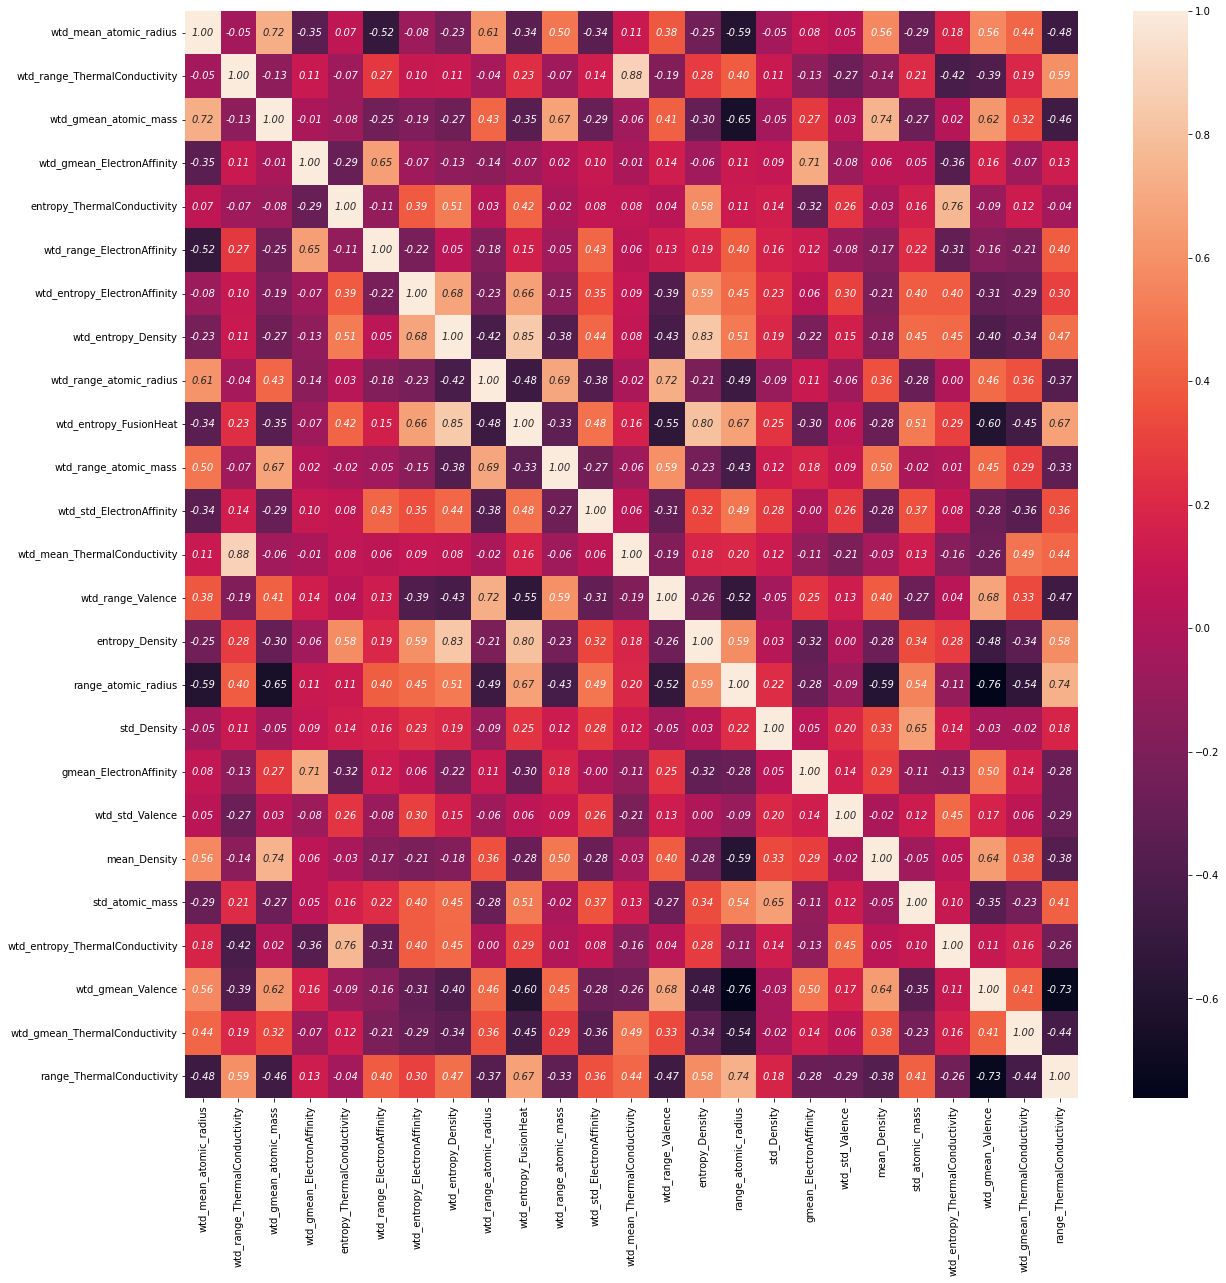

In [64]:
#Correlation plot for revised features
train_25 = train[result_25.Features]
corrM = train_25.corr()
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
plt.figure(figsize=(20,20))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws)

In [65]:
#Delete high collinear variables (Pearson coefficient > 0.85)
correlation_5 = correlation_4.drop(['wtd_range_ThermalConductivity'], axis=1)

,number_of_elements,mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,mean_fie,...,range_ThermalConductivity,mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence
0,4,88.944468,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,775.425000,...,399.97342,2.25,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059
1,5,92.729214,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,766.440000,...,429.97342,2.00,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606
2,4,88.944468,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,775.425000,...,399.97342,2.25,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697
3,4,88.944468,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,775.425000,...,399.97342,2.25,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952
4,4,88.944468,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,775.425000,...,399.97342,2.25,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,661.775000,...,134.00000,3.25,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904
21259,5,92.266740,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,747.780000,...,399.97342,2.20,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959
21260,2,99.663190,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,733.550000,...,17.00000,4.50,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000
21261,2,99.663190,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,733.550000,...,17.00000,4.50,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493


In [66]:
#Run random forest again to get revised correlation
X=correlation_5.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
#Fit a random forest regressor with max_depth = 8
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6608)
forest.fit(X_train, y_train)
#Get the accuracy score
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
a = np.array(correlation_5.columns)
b = np.array(forest.feature_importances_)
d = {'Features': [a],
    'Importance': [b]}
df_col = pd.DataFrame(a,columns=['Features'])
df_imp = pd.DataFrame(b,columns=['Importance'])
frames = [df_col, df_imp]
result = pd.concat(frames, axis=1)
result = result.sort_values(by=['Importance'])
result_25 = result.tail(25)

Accuracy on training set: 0.897
Accuracy on test set: 0.870


,Features,Importance
18,wtd_mean_atomic_radius,0.002532
31,wtd_range_Density,0.002856
3,wtd_gmean_atomic_mass,0.003275
56,entropy_ThermalConductivity,0.003875
36,wtd_gmean_ElectronAffinity,0.003884
39,wtd_range_ElectronAffinity,0.004209
38,wtd_entropy_ElectronAffinity,0.004878
29,wtd_entropy_Density,0.004941
24,wtd_range_atomic_radius,0.005019
47,wtd_entropy_FusionHeat,0.005061


<AxesSubplot:>

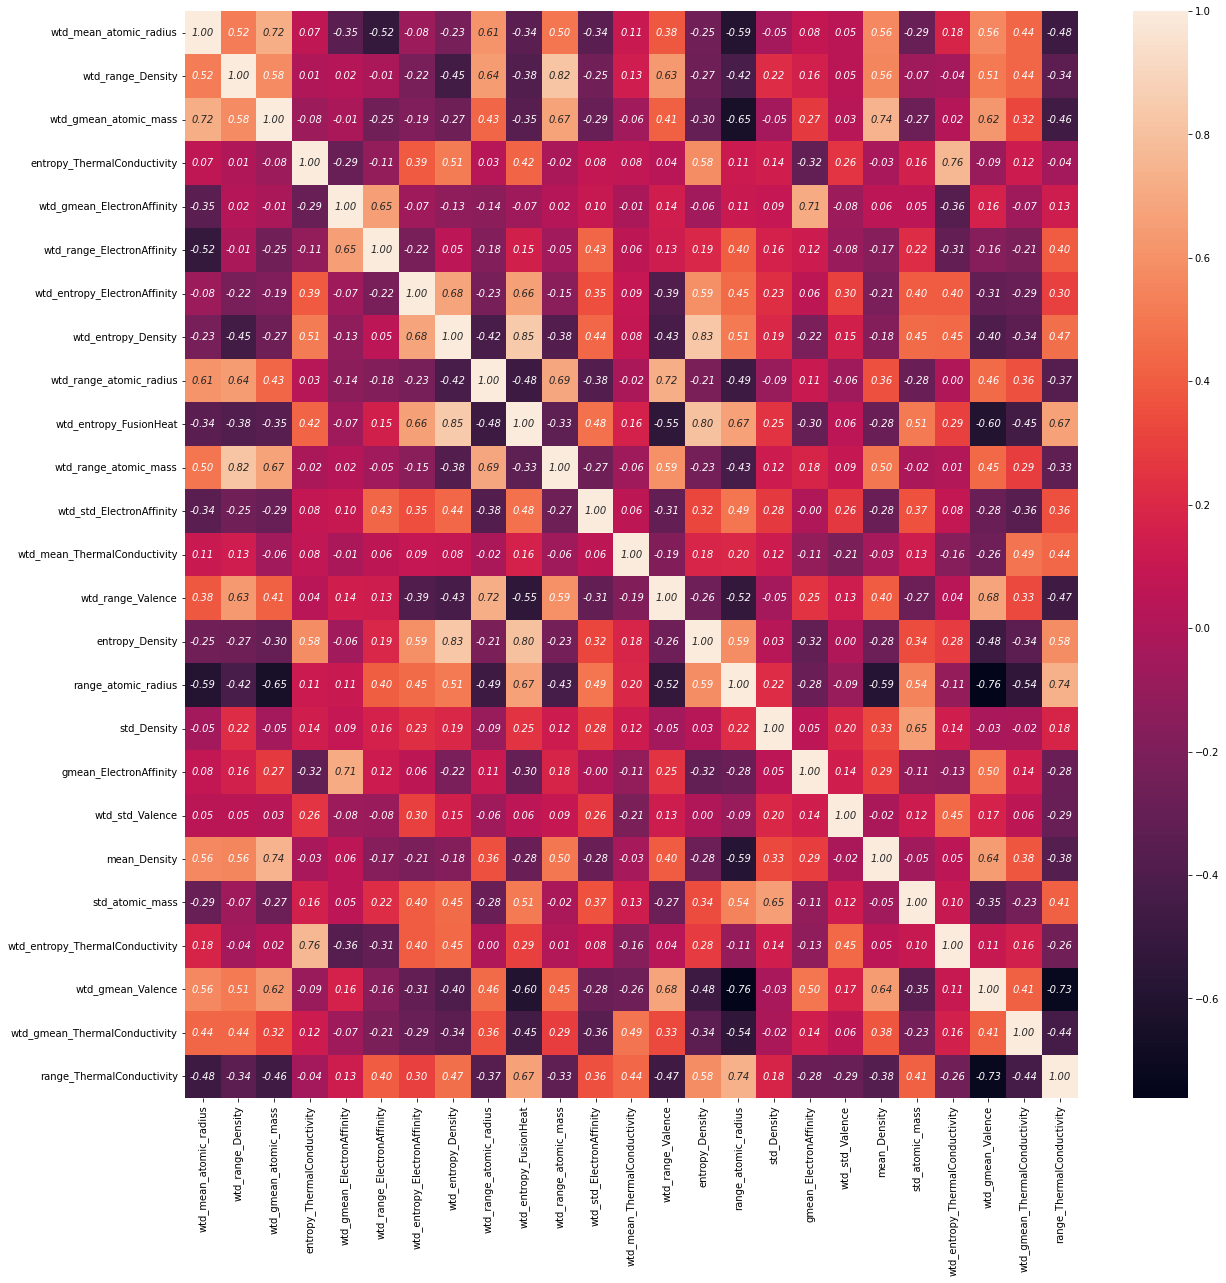

In [67]:
#Correlation plot for revised features
train_25 = train[result_25.Features]
corrM = train_25.corr()
annot_kws={'fontsize':10, 
           'fontstyle':'italic'}
plt.figure(figsize=(20,20))
sns.heatmap(corrM, annot=True, fmt='.2f',annot_kws= annot_kws)

In [74]:
#Run Linear regression model with top 25 features
results_list = result_25['Features']
train = pd.read_csv('train.csv')
X=train[train.columns.intersection(results_list)]
y = train['critical_temp']
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=6608)
model = sm.OLS(y_train, X_train).fit()
model.summary()

E:\Python\Anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          critical_temp   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     1356.
Date:                Wed, 12 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:48:29   Log-Likelihood:                -69840.
No. Observations:               15947   AIC:                         1.397e+05
Df Residuals:                   15921   BIC:                         1.399e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              17.6074      1.793      9.822      0.000      14.094      21.121
wtd_gmean_atomic_mass               0.1241      0.012     10.485      0.000       0.101       0.147
wtd_range_atomic_mass              -0.1894      0.016    -11.614      0.000      -0.221      -0.157
std_atomic_mass                     0.2665      0.014     19.379      0.000       0.240       0.293
wtd_mean_atomic_radius             -0.0366      0.013     -2.751      0.006      -0.063      -0.011
range_atomic_radius                 0.1349      0.006     22.479      0.000       0.123       0.147
wtd_range_atomic_radius            -0.0421      0.012     -3.587      0.000      -0.065      -0.019
mean_Density                       -0.0008      0.000     -5.668      0.000      -0.001      -0.000
entropy_Density                   -12.1269      1.695     -7.155      0.000     -15.449      -8.805
wtd_entropy_Density                 0.3030      1.717      0.176      0.860      -3.063       3.670
wtd_range_Density                   0.0011      0.000      6.502      0.000       0.001       0.001
std_Density                        -0.0013      0.000     -6.996      0.000      -0.002      -0.001
gmean_ElectronAffinity              0.0601      0.015      4.140      0.000       0.032       0.089
wtd_gmean_ElectronAffinity         -0.1201      0.017     -6.944      0.000      -0.154      -0.086
wtd_entropy_ElectronAffinity      -29.1869      1.349    -21.640      0.000     -31.831     -26.543
wtd_range_ElectronAffinity         -0.1553      0.017     -9.230      0.000      -0.188      -0.122
wtd_std_ElectronAffinity            0.0797      0.014      5.782      0.000       0.053       0.107
wtd_entropy_FusionHeat             24.4281      1.218     20.061      0.000      22.041      26.815
wtd_mean_ThermalConductivity        0.4142      0.011     38.254      0.000       0.393       0.435
wtd_gmean_ThermalConductivity      -0.4292      0.012    -37.208      0.000      -0.452      -0.407
entropy_ThermalConductivity         2.3679      1.350      1.754      0.079      -0.278       5.014
wtd_entropy_ThermalConductivity    13.9960      1.253     11.170      0.000      11.540      16.452
range_ThermalConductivity          -0.0024      0.003     -0.705      0.481      -0.009       0.004
wtd_gmean_Valence                  -3.0444      0.362     -8.405      0.000      -3.754      -2.334
wtd_range_Valence                   7.0437      0.415     16.955      0.000       6.229       7.858
wtd_std_Valence                   -14.4336      0.487    -29.640      0.000     -15.388     -13.479
==============================================================================
Omnibus:                      419.366   Durbin-Watson:                   2.043
Prob(Omnibus):           

In [80]:
#RMSE check for different models
y = np.array(train.critical_temp)
X = X.values
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=66)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Check Accuracy
print('RMSE_Ridge=',np.sqrt(mean_squared_error(y_test,y_pred)))
cld = linear_model.Lasso(alpha=0.1)
cld.fit(X_train, y_train)
y_pred = cld.predict(X_test)
#Check Accuracy
print('RMSE_Lasso=',np.sqrt(mean_squared_error(y_test,y_pred)))
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
#Check Accuracy
print('RMSE_Elastic=',np.sqrt(mean_squared_error(y_test,y_pred)))
#Fit a random forest regressor with max_depth = 8
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
#Check Accuracy
print('RMSE_Forest=',np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE_LR= 19.50555084596751
RMSE_Ridge= 19.506193820041116
RMSE_Lasso= 19.63141943507228
RMSE_Elastic= 20.929668602060058
RMSE_Forest= 12.540231031814107


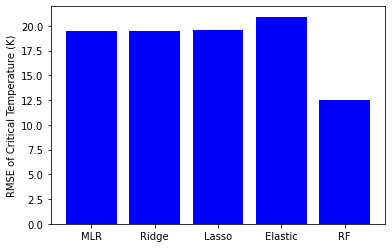

In [95]:
Model = ['MLR','Ridge','Lasso','Elastic','RF']
RMSE = [19.505,19.506,19.631,20.93,12.54]
plt.bar(Model,RMSE, color ='blue')
plt.ylabel("RMSE of Critical Temperature (K)");
plt.savefig('barplot.png', dpi = 300)

RMSE_Forest= 12.540231031814107


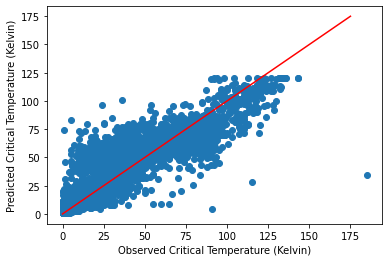

In [98]:
#Draw scatter plot for Random Forest Model
forest = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=6608)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
#Check Accuracy
print('RMSE_Forest=',np.sqrt(mean_squared_error(y_test,y_pred)))
x_45 = [0,175]
y_45 = [0,175]
plt.scatter(y_test,y_pred)
plt.plot(x_45,y_45,'r');
plt.xlabel('Observed Critical Temperature (Kelvin)');
plt.ylabel('Predicted Critical Temperature (Kelvin)');
plt.savefig('RF_Scatter.png', dpi = 300)

RMSE_LR= 19.50555084596751


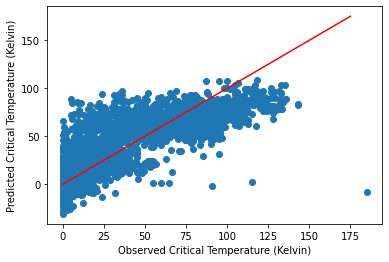

In [99]:
#Draw Scatter plot for linear regression model
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
#Check Accuracy
print('RMSE_LR=',np.sqrt(mean_squared_error(y_test,y_pred)))
x_45 = [0,175]
y_45 = [0,175]
plt.scatter(y_test,y_pred)
plt.plot(x_45,y_45,'r');
plt.xlabel('Observed Critical Temperature (Kelvin)');
plt.ylabel('Predicted Critical Temperature (Kelvin)');
plt.savefig('LR_Scatter.png', dpi = 300)